# Introduction

Fortunately, with libraries such as Scikit-Learn, it’s now easy to build and use almost any machine learning algorithm. But it’s helpful to have an idea of how a machine learning model works under the hood. This lets us diagnose the model when it’s underperforming or explain how it makes decisions, which is crucial if we want to convince others to trust our models.
In this assignment, we’ll look at how to build and use the Decision Tree and the Random Forest in Python. We’ll start by understanding how a single decision tree makes classifications on a simple problem. Then, we’ll work our way to using a random forest on a real-world data science problem.

# Dataset

The dataset we will use in this assignment is the Sonar dataset.

This is a dataset that describes sonar chirp returns bouncing off different surfaces. The 60 predictors are the strength of the returns at different angles. It is a binary classification problem that requires a model to differentiate rocks from metal cylinders. There are 208 observations.

It is a well-understood dataset. All of the variables are continuous and generally in the range of 0 to 1. The output variable is a string “M” for mine and “R” for rock, which will need to be converted to integers 1 and 0.

By predicting the class with the most observations in the dataset (M or mines) the Zero Rule Algorithm can achieve an accuracy of 53%.

You can learn more about this dataset at the UCI Machine Learning repository.
https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

Download the dataset for free and place it in the "data" folder in your working directory with the filename sonar.all-data.csv.

# Import section

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import tests_7 as tests

In [3]:
RANDOM_STATE = 2020

# Preprocess data

Read data and convert targets to integers 1 and 0.

In [4]:
PATH = 'data/'
df = pd.read_csv(PATH+'sonar-all-data.csv', header=None)
df.columns = [f'feat_{col}' if col!=60 else 'target' for col in df.columns]
df['target'] = df['target'].map({'M': 1, 'R': 0})
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


# Split data (train and test)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size=0.2, random_state=RANDOM_STATE)

# Homework part 1. Implementation of Random Forest Classifier.

## Splitting criteria

**Task 1 - 2 points.** In this section you should implement two criteria for splitting of the feature space. Any of these can be used in the model.

### Gini index

0.5 points for *gini_index* function

In [6]:
target_values = np.unique(df['target'])
target_values

array([0, 1])

In [7]:
def gini_index(x):
    """ Calculate Gini Index for a node
    Args:
        x: Numpy-array of targets in a node
    Returns:
        float: Gini index
    """    
    n = len(x)
    if n==0:
        return 0
#     distinct_counts = np.array([len(x[x==value]) for value in target_values])
#     gini = 1 - np.sum((distinct_counts / n) ** 2)
    _, counts = np.unique(x, return_counts=True)
    gini = 1 - np.sum((counts / n) ** 2)
    return gini

In [8]:
tests.test_gini_index(gini_index)

 All good!


0.5 points for *gini_gain* function

In [9]:
def gini_gain(parent_node, splits):
    """ Calculate Gini Gain for a particular split
    Args:
        parent_node: Numpy-array of targets in a parent node
        splits: List of two numpy-arrays. Each numpy-array is targets in a child node
    Returns:
        float: Gini gain
    """    
    n = len(parent_node)
    gain = gini_index(parent_node) - sum(len(child) / n * gini_index(child) for child in splits)
    return gain

In [10]:
tests.test_gini_gain(gini_gain)

 All good!


### Entropy

0.5 points for *entropy* function. WARNING! Use only natural logarithm np.log() for calculation.

In [11]:
def entropy(x):
    """ Calculate Entropy for a node
    Args:
        x: Numpy-array of targets in a node
    Returns:
        float: Entropy
    """
    # If you use vectorized operations on a vector of frequencies p
    # where some of the relative frequencies may be 0, and you need to evaluate
    # the expression p * np.log(p), you can use the "where" argument of the np.log() function.
    # This will leave those elements of the array untouched by the function, 
    # thus evaluating x*log(x) as zero, exactly as we want it to be.
    n = len(x)
    if n==0:
        return 0
    _, counts = np.unique(x, return_counts=True)
    probs = counts / n
    return - np.sum(probs * np.log(probs))
#     probs = np.array([len(x[x==value]) / n for value in target_values])
#     return - np.sum(probs * np.log(probs, where=(probs!=0)))

In [12]:
tests.test_entropy(entropy)

 All good!


0.5 points for *information_gain* function

In [13]:
def information_gain(parent_node, splits):
    """ Calculate Information Gain for a particular split
    Args:
        parent_node: Numpy-array of targets in a parent node
        splits: List of two numpy-arrays. Each numpy-array is targets in a child node
    Returns:
        float: Information Gain
    """     
    n = len(parent_node)
    return entropy(parent_node) - sum([len(child) / n * entropy(child) for child in splits])

In [14]:
tests.test_information_gain(information_gain)

 All good!


## Split function

**Task 2 - 1 point** Implement *split_dataset* function. <br>
The rows of the dataframe received by a tree node are split into two dataframes depending on their values in a selected column. Rows with values smaller than the chosen threshold are stored in the resulting left dataframe, and we save rows with values larger than the threshold in the right dataframe. The array with target values should be split in accordance with the feature dataframe.

In [15]:
def split(X, y, value):
    """ Split y-values in order to calculate gain later
    Args:
        X: 1-dimensional numpy-array of data predictor with shape (N,)
        y: 1-dimensional numpy-array of targets with shape (N,)
        value (float): the value by which the X should be splitted
    Returns:
        Two 1-dimensional numpy-arrays with targets related to splits
    """      
    left_mask = X < value
    right_mask = X >= value
    return y[left_mask], y[right_mask]


def split_dataset(X, y, column, value):
    """ Split dataset by a particular column and value
    Args:
        X: 2-dimensional numpy-array (N, num_feats). N-number of samples
        y: 1-dimensional numpy-array of targets with shape (N,)  
        column (int): the column by which the X should be splitted
        value (float): the value by which the column should be splitted
    Returns:
        Two 2-dimensional numpy-arrays with data and two 1-dimensional numpy-arrays with targets related to splits
        left_X, right_X, left_y, right_y
    """       
    left_mask = X[:, column] < value
    right_mask = X[:, column] >= value
    left_y, right_y = y[left_mask], y[right_mask]
    left_X, right_X = X[left_mask], X[right_mask]
    return left_X, right_X, left_y, right_y

In [16]:
tests.test_split_dataset(split_dataset)

 All good!


## Decision tree

**Task 3 - 4.5 points** In the Tree class below you need to complete the *fit(), predict_row()* and *predict()* functions.<br>
Each tree is basically a tree node that may have a left and a right child that are also trees. If a tree doesn't have any child nodes, we call it a leaf.<br>
Since features for splitting a dataframe are chosen randomly, we need a mechanism to control this randomness to aquire reproducibility for testing purposes. In our case we use the [Random Generator](https://numpy.org/doc/stable/reference/random/generator.html)<br>
By creation of a tree only the **criterion** and the **rng** fields are not filled with Nones, so each tree knows what criterion for dataframe splitting it should use. Each fitted tree knows as well by which column and value the split should be performed. If a tree is a leaf it doesn't have information about the split, but stores the predicted value.

In [17]:
class Tree(object):
    """A decision tree classifier.

    Args:
        criterion : {"gini", "entropy"}, default="gini"
            The function to measure the quality of a split. Supported criteria are
            "gini" for the Gini impurity and "entropy" for the information gain.
        random_gen: numpy Random Generator object, default=None
            Generator should be passed over for reproducible results. If None, 
            a new np.random.default_rng() will be created.
    """
    def __init__(self, criterion='gini', random_gen=None):
        if criterion not in ["gini", "entropy"]:
            raise ValueError(f'Unknown criteria for splits {criterion}')
        self.criterion = criterion
        self.threshold = None           # value of the next split
        self.column_index = None        # column to use for the next split
        self.outcome_probs = None       # the predicted value if the tree is a leaf
        self.left_child = None
        self.right_child = None
        self.rng = random_gen if random_gen is not None else np.random.default_rng()

    @property
    def is_terminal(self):
        """Define is it terminal node."""          
        return not bool(self.left_child and self.right_child)
    
    def _compute_gain(self, y, splits):
        """Compute split gain according to chosen criteria."""
        func = gini_gain if self.criterion == 'gini' else information_gain
        return func(y, splits)

    def _find_splits(self, X):
        """Find all possible split values."""
        split_values = set()

        # Get unique values in a sorted order
        x_unique = list(np.unique(X))
        for i in range(1, len(x_unique)):
            # Find a point between two values
            average = (x_unique[i - 1] + x_unique[i]) / 2.0
            split_values.add(average)

        return list(split_values)

    def _find_best_split(self, X, y, n_features):
        """Find best feature and value for a split. Greedy algorithm."""
        # Sample random subset of features
        subset = self.rng.choice(list(range(0, X.shape[1])), n_features, replace=False)

        max_gain, max_col, max_val = None, None, None

        for column in subset:
            split_values = self._find_splits(X[:, column])
            for value in split_values:
                splits = split(X[:, column], y, value)
                gain = self._compute_gain(y, splits)
                
                if (max_gain is None) or (gain > max_gain):
                    max_col, max_val, max_gain = column, value, gain
        return max_col, max_val, max_gain
    
    def _compute_outcome(self, y):
        """Save outcome probabilities for the leaf."""
        self.outcome_probs = np.around(np.sum(y) / y.shape[0])

    def fit(self, X, y, feature_frac=1.0, max_depth=None):
        """Fit model.

        Args:
            X (numpy-array):      The training input samples. 2-dimensional numpy array.
            y (numpy-array):      The target values. 1-dimensional numpy array.
            feature_frac (float): The fraction of features to use when fit is performed. Must be 
                                  between 0.0 and 1.0 (default: 1.0, i.e. all features).
            max_depth (int):      The maximum depth of the tree. If None, then nodes are expanded
                                  until all leaves are pure.
        """
        # 3 points
        
        # Make this tree a leaf and return if max_depth doesn't allow it to grow further
        if max_depth is not None and max_depth==0:
            self._compute_outcome(y)
            return
        
        if not 0.0 <= feature_frac <= 1.0:
            raise ValueError('feature_frac must lie between 0.0 and 1.0')
        # Compute the number of features to use. Should be integer number
        n_features = int(feature_frac * X.shape[1])
        
        # Find the next split    
        column, value, gain = self._find_best_split(X, y, n_features)
        
        # Make this tree a leaf and return if the split doesn't bring any gain
        if gain is None or gain <= 0:
            self._compute_outcome(y)
            return
        
        # Save the necessary information about the next split
        self.threshold = value
        self.column_index = column
        
        # Reduce the max_depth parameter for the next tree
        if max_depth is not None:
            max_depth -= 1

        # Split dataset
        left_X, right_X, left_target, right_target = split_dataset(X, y, self.column_index, self.threshold)

        # Grow left and right child. Pass over the parent's random generator
        # for reproducible results 
        self.left_child = Tree(criterion=self.criterion, random_gen=self.rng)
        self.left_child.fit(left_X, left_target, feature_frac, max_depth)

        self.right_child = Tree(criterion=self.criterion, random_gen=self.rng)
        self.right_child.fit(right_X, right_target, feature_frac, max_depth)

    def predict_row(self, row):
        """Predict single row."""
        # 0.5 points
        
        if not self.is_terminal:
            # Use the stored information about the split to define 
            # if the right or the left child to use
            if row[self.column_index] < self.threshold:
                return self.left_child.predict_row(row)
            else:
                return self.right_child.predict_row(row)
        return self.outcome_probs

    def predict(self, X):
        """Make predictions.

        Args:
            X (numpy-array): The test input samples. 2-dimensional numpy array.
        Returns:
            1-dimensional numpy-array with predictions     
        """ 
        # 1 point
        
        # Create a numpy array of zeros of necessary length to save predictions
        result = np.zeros(X.shape[0])
        # Go through all rows of the dataset
        for i in range(X.shape[0]):
            # Save the prediction for the current row
            result[i] = self.predict_row(X[i])
        return result

In [18]:
tests.test_tree(Tree)

 All good!


**Task 4 - 1 point** Fit two models with "max_depth=3" and "max_depth=None" hyperparameters. **Explain** the results.

In [19]:
# Your code here
# Tree fitted with max_depth=3
tree_3 = Tree(random_gen=np.random.default_rng(RANDOM_STATE))
tree_3.fit(X_train.values, y_train, max_depth=3)
accuracy_train_3 = accuracy_score(y_train, tree_3.predict(X_train.values))
accuracy_test_3 = accuracy_score(y_test, tree_3.predict(X_test.values))

# Tree fitted with max_depth=None
tree_inf = Tree(random_gen=np.random.default_rng(RANDOM_STATE))
tree_inf.fit(X_train.values, y_train)
accuracy_train_inf = accuracy_score(y_train, tree_inf.predict(X_train.values))
accuracy_test_inf = accuracy_score(y_test, tree_inf.predict(X_test.values))

In [20]:
# Your code here
pd.DataFrame({"Train accuracy": [accuracy_train_3, accuracy_train_inf], \
              "Test accuracy": [accuracy_test_3, accuracy_test_inf]}, \
             index=["max_depth=3", "max_depth=None"])

,Train accuracy,Test accuracy
max_depth=3,0.927711,0.666667
max_depth=None,1.000000,0.642857


*Let's check the depth of the second decision tree with `max_depth=None`:*

In [21]:
def count_depth(tree):
    if tree.is_terminal:
        return 0
    return max(count_depth(tree.left_child), count_depth(tree.right_child)) + 1

In [22]:
print(f'Depth of the second tree equals {count_depth(tree_inf)}.')

Depth of the the second tree equals 6.


***Results explanation***

*As we see, the second tree has twice more levels, but its test accuracy is worser than by the tree with 3 levels. The train accuracies tell us, that the second tree can be also overfitted (but I'm not sure). Furthermore, the tree with unlimited depth can take much more PC resources for the fitting.*

In [23]:
def plot_metrics_on_depths(criterion='gini'):
    max_depths, train_scores, test_scores = [], [], []
    for max_depth in range(0, 8):
        max_depths.append(max_depth)
        model = Tree(criterion=criterion)
        model.fit(X_train.values, y_train.values, max_depth=max_depth)
        train_scores.append(accuracy_score(y_train, model.predict(X_train.values)))
        y_pred = model.predict(X_test.values)
        test_scores.append(accuracy_score(y_test, y_pred))
    res_metrics = pd.DataFrame(data={'train': train_scores, 'test': test_scores}, index=max_depths)
    sns.set(rc={'figure.figsize':(16, 6)})
    plt.plot(res_metrics['train'], label='train score')
    plt.plot(res_metrics['test'], label='test score')
    plt.title("Accuracy as a function of max_depth")
    plt.xlabel('max_depth')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show();

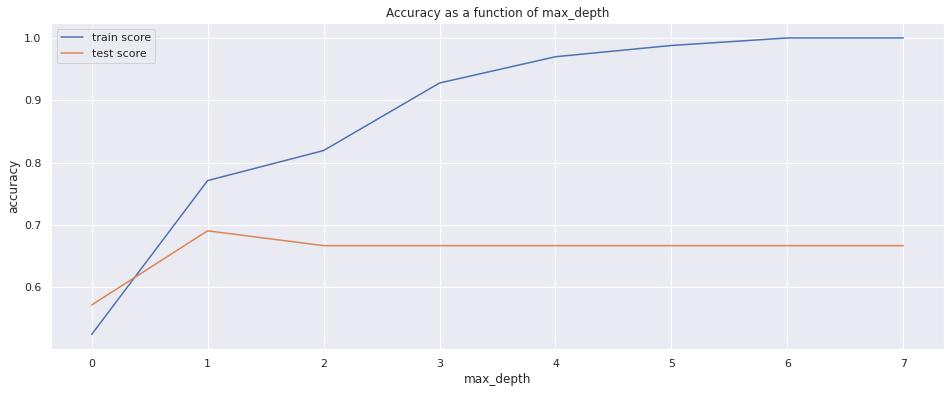

In [24]:
plot_metrics_on_depths('gini')

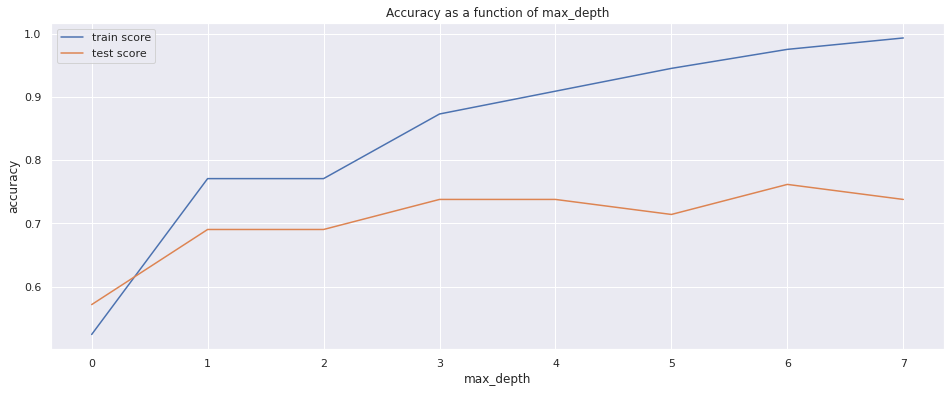

In [25]:
plot_metrics_on_depths('entropy')

*The graphs show us that tree with `depth=7` doesn't overfitts. And the best accuracy was reached using entropy criteria.*

## Random forest

**Task 5 - 1.5 Points** In the RandomForestClassifier class below you need to complete the *fit* and *predict()* functions

In [26]:
class Custom_RandomForestClassifier(object):
    """
    A random forest classifier.
    A random forest is a meta estimator that fits a number of decision tree
    classifiers on various sub-samples of the dataset and uses averaging to
    improve the predictive accuracy and control overfitting.
    
    Args:
        n_estimators : int, default=10
            The number of trees in the forest.

        max_depth : int, default=None
            The maximum depth of the tree. If None, then nodes are expanded until
            all leaves are pure.        

        feature_frac : float, default=None
            The fraction of features to use when looking for the best split. Must be 
            between 0.0 and 1.0. If None, then `feature_frac = 1 / sqrt(n_features)`.

        criterion : {"gini", "entropy"}, default="gini"
            The function to measure the quality of a split. Supported criteria are
            "gini" for the Gini impurity and "entropy" for the information gain.
            
        random_gen: numpy Random Generator object, default=None
            Generator should be passed over for reproducible results. If None, 
            a new np.random.default_rng() will be created.
    """

    def __init__(self, n_estimators=10, max_depth=None, feature_frac=None, 
                 criterion="entropy", bootstrap=True, random_gen=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.bootstrap = bootstrap
        self.feature_frac = feature_frac
        
        if criterion not in ["gini", "entropy"]:
            raise ValueError(f'Unknown criteria for splits {criterion}')
        self.criterion = criterion
        
        self.rng = random_gen if random_gen is not None else np.random.default_rng()
        self.trees = [Tree(criterion=self.criterion, random_gen=self.rng) 
                            for _ in range(n_estimators)]
        
    def _init_data(self, X, y):
        """Ensure data are in the expected format.
        Ensures X and y are stored as numpy ndarrays by converting from an
        array-like object if necessary. 
        Parameters
        Args:
            X : array-like
                Feature dataset.
            y : array-like, default=None
                Target values. By default is required, but if y_required = false
                then may be omitted.
        """
        self.size = len(X)
        
        if not isinstance(X, np.ndarray):
            self.X = np.array(X)
        else:
            self.X = X

        if not isinstance(y, np.ndarray):
            self.y = np.array(y)
        else:
            self.y = y
            
    def bootstrap_data(self, size):
        return self.rng.integers(size, size=size)
    
    def fit(self, X, y):
        """Fit model.

        Args:
            X (numpy-array): The training input samples. 2-dimensional numpy array.
            y (numpy-array): The target values. 1-dimensional numpy array.
        """
        # 0.5 points
        
        if self.feature_frac is None:
            self.feature_frac = 1 / np.sqrt(X.shape[1])
        elif not 0.0 <= self.feature_frac <= 1.0:
            raise ValueError('feature_frac must lie between 0.0 and 1.0')
            
        self._init_data(X, y)
        
        # Iterate over all trees in the forest
        for tree in self.trees:
            if self.bootstrap:
                idxs = self.bootstrap_data(self.size)
                X = self.X[idxs]
                y = self.y[idxs]
            else:
                X = self.X
                y = self.y
                
            # Fit the tree    
            tree.fit(X, y, feature_frac=self.feature_frac, max_depth=self.max_depth)
            
    def predict(self, X):
        """Make predictions.

        Args:
            X (numpy-array): The test data input samples. 2-dimensional numpy array.
        """
        # 1 point
        
        if not isinstance(X, np.ndarray):
            X = np.array(X)

        if self.X is not None:
            # Create a numpy array of zeros of necessary length
            predictions = np.zeros(X.shape[0])
            # Go through all rows of the dataset
            for i in range(X.shape[0]):
                # Initialize a counter for voting
                row_pred = 0
                # Sum up predictions from all the voters
                for tree in self.trees:
                    row_pred += tree.predict_row(X[i])
                # Compute the mean of the votes    
                row_pred /= self.n_estimators
                # Save the rounded value as the prediction for the current row
                predictions[i] = np.around(row_pred)
            return predictions  
        else:
            raise ValueError("You should fit a model before `predict`")

    # Methods important to implement GridSearch and RandomSearch
    def get_params(self, deep=True):
        return {'n_estimators': self.n_estimators, 'max_depth': self.max_depth, 'feature_frac': self.feature_frac, 
                 'criterion': self.criterion, 'bootstrap': self.bootstrap}

    def set_params(self, **params):
        if not params:
            return self
        valid_params = self.get_params(deep=True)

        for key, value in params.items():
            valid_params[key] = value

        return self

In [27]:
tests.test_random_forest(Custom_RandomForestClassifier)

 All good!


**Task 6 - 1 Point** Fit two models with "n_estimators=10" and "n_estimators=100" hyperparameters. **Explain** the results.

In [28]:
# Your code here
# Forest with 10 trees
forest_10 = Custom_RandomForestClassifier(random_gen=np.random.default_rng(RANDOM_STATE))
forest_10.fit(X_train.values, y_train)
train_acc_10 = accuracy_score(y_train, forest_10.predict(X_train.values))
test_acc_10 = accuracy_score(y_test, forest_10.predict(X_test.values))

# Forest with 100 trees
forest_100 = Custom_RandomForestClassifier(random_gen=np.random.default_rng(RANDOM_STATE), n_estimators=100)
forest_100.fit(X_train.values, y_train)
train_acc_100 = accuracy_score(y_train, forest_100.predict(X_train.values))
test_acc_100 = accuracy_score(y_test, forest_100.predict(X_test.values))

In [29]:
# Your code here
print('Results for models with unlimited depth:')
pd.DataFrame({"Train accuracy": [train_acc_10, train_acc_100], \
              "Test accuracy": [test_acc_10, test_acc_100]}, \
             index=["n_estimators=10", "n_estimators=100"])

Results for models with unlimited depth:


,Train accuracy,Test accuracy
n_estimators=10,0.993976,0.738095
n_estimators=100,1.000000,0.857143


*We can observe, that second model's test accuracy is better, but train accuracy equals 1. Probably, it's can be explained by overfitting.*

*Let's see what we will get with `max_depth=3`.*

In [30]:
# Your code here
# Forest with 10 trees
forest_10_depth_3 = Custom_RandomForestClassifier(max_depth=3, random_gen=np.random.default_rng(RANDOM_STATE))
forest_10_depth_3.fit(X_train.values, y_train)
train_acc_10_depth_3 = accuracy_score(y_train, forest_10_depth_3.predict(X_train.values))
test_acc_10_depth_3 = accuracy_score(y_test, forest_10_depth_3.predict(X_test.values))

# Forest with 100 trees
forest_100_depth_3 = Custom_RandomForestClassifier(n_estimators=100, max_depth=3, \
                                            random_gen=np.random.default_rng(RANDOM_STATE))
forest_100_depth_3.fit(X_train.values, y_train)
train_acc_100_depth_3 = accuracy_score(y_train, forest_100_depth_3.predict(X_train.values))
test_acc_100_depth_3 = accuracy_score(y_test, forest_100_depth_3.predict(X_test.values))

In [31]:
# Your code here
print('Results for models with max depth = 3:')
pd.DataFrame({"Train accuracy": [train_acc_10_depth_3, train_acc_100_depth_3], \
              "Test accuracy": [test_acc_10_depth_3, test_acc_100_depth_3]}, \
             index=["n_estimators=10", "n_estimators=100"])

Results for models with max depth = 3:


,Train accuracy,Test accuracy
n_estimators=10,0.903614,0.714286
n_estimators=100,0.975904,0.785714


*In these models train accuracy doesn't reach 1. But the test accuracies are worser than in previous model.*

*Let's plot graphs with different number of estimators for these both options.*

In [32]:
def plot_metrics_on_estimators(criterion='entropy', max_depth=None):
    ns_estimators, train_scores, test_scores = [], [], []
    for n_estimators in range(10, 101, 10):
        ns_estimators.append(n_estimators)
        model = Custom_RandomForestClassifier(criterion=criterion, n_estimators=n_estimators, max_depth=max_depth, \
                                       random_gen=np.random.default_rng(RANDOM_STATE))
        model.fit(X_train.values, y_train.values)
        train_scores.append(accuracy_score(y_train, model.predict(X_train.values)))
        y_pred = model.predict(X_test.values)
        test_scores.append(accuracy_score(y_test, y_pred))
    res_metrics = pd.DataFrame(data={'train': train_scores, 'test': test_scores}, index=ns_estimators)
    sns.set(rc={'figure.figsize':(16, 6)})
    plt.plot(res_metrics['train'], label='train score')
    plt.plot(res_metrics['test'], label='test score')
    plt.title("Accuracy as a function of n_estimators")
    plt.xlabel('n_estimators')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show();

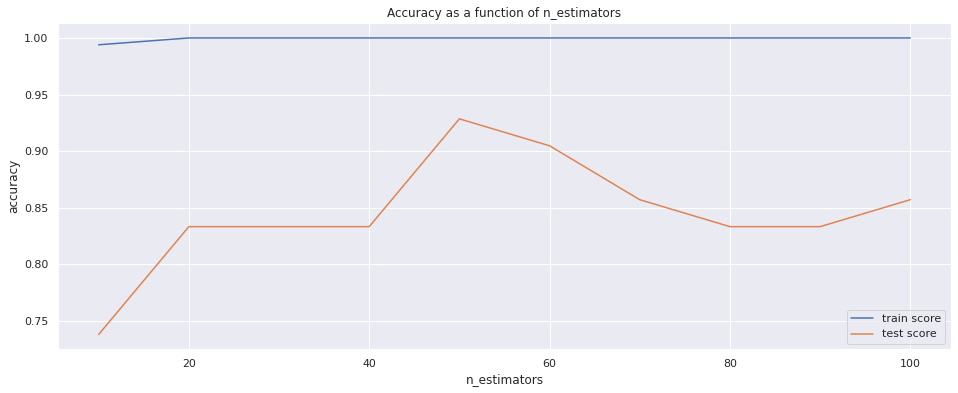

In [33]:
plot_metrics_on_estimators()

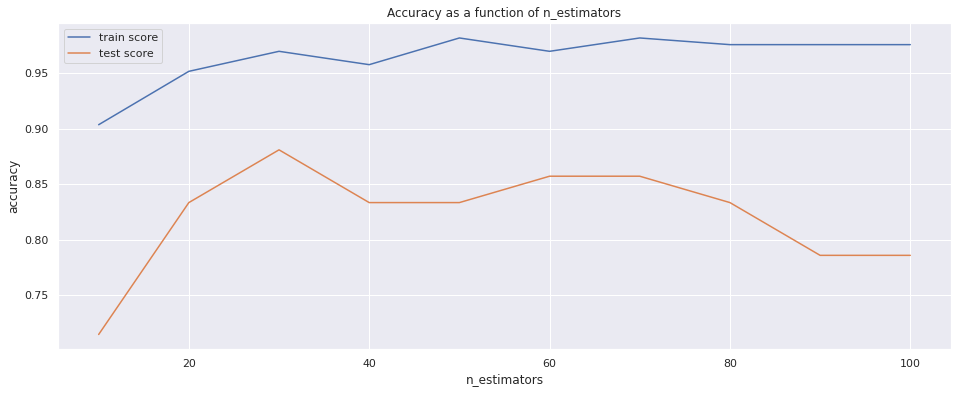

In [34]:
plot_metrics_on_estimators(max_depth=3)

***Results explanation***

*We can observe, that model with unlimited depth value is getting better for n_estimators more than 10, but `n_estimators=100` can be not the best option.*

*Model with `max_depth=3` is also getting better with number of trees more than 10.*

*So we can make conclusion, that it's worse to use a pretty large number of estimators that give us better accuracy, while correlating the increase in quality and the amount of resources expended for computing. It's worse to find the best range of this number for each task individually.*

Now it's your turn to explore the various parameters of Custom_RandomForestClassifier and their influence on model quality.

# Homework part 2. Random Forest in action

_Note_: Consider **accuracy** as main metric of model performance on this dataset.

_Note_: For tasks 1 to 5 please use your custom Custom_RandomForestClassifier if it is completed.

**Task 1 (0.5 points)** Split the dataset into train, test and validation parts (0.6 / 0.2 / 0.2). First two will be used for model hyperparameter tuning whereas the best model quality should be evaluated on validation part.

In [35]:
# Your code here
X_train_test, X_val, y_train_test, y_val = train_test_split(df.drop(columns='target'), df['target'], test_size=0.2, \
                                                            random_state=RANDOM_STATE)
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.2/0.8, \
                                                    random_state=RANDOM_STATE)

*Since we use search models with cross-validation in the next steps, I'll use only first partition in `train_test` and `val` parts.*

### Grid Search and Random Search

If you have enough computational power for model training in a reasonable amount of time more sophisticated approach of hyperparameter tuning would be either Grid Search or Random Search.<br>

In a nutshell Grid Search allows you to pass through all different combinations of given model parameters and their values and choose the best combination. Whereas Random Search would randomly choose values for given model parameters and evaluate them on test data untill it reaches the specified number of iterations.<br>

More information here [Gentle introduction to Grid and Random search](https://medium.com/@senapati.dipak97/grid-search-vs-random-search-d34c92946318) and here [Detailed Explanation with code examples](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/).

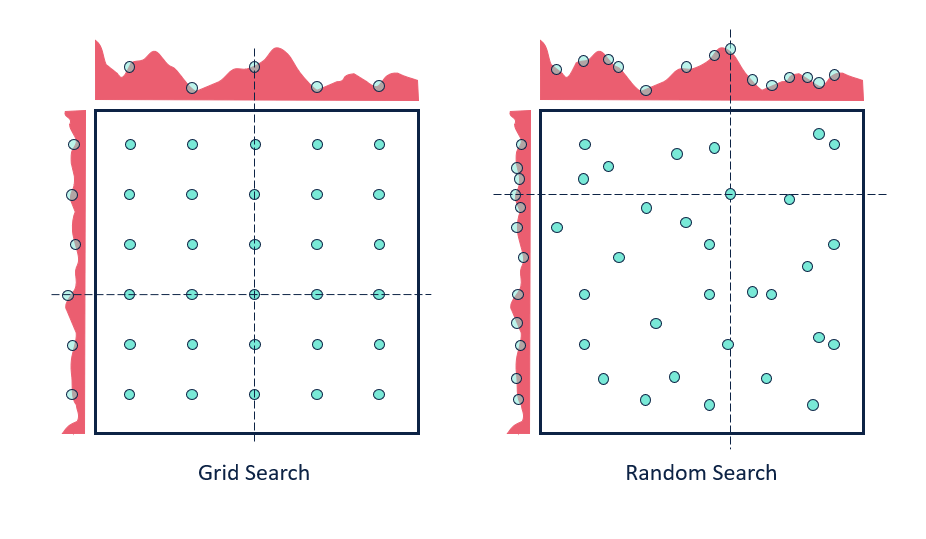

**Task 3 (1 point)**. Compare your previous results with [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) hyperparameter tuning. You may tune best hyperparameters for forest with several trees and then increase it while measure the quality on validation dataset.

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Your code here
params = {'max_depth': [3, 4, 5, None],
          'feature_frac': np.append(np.linspace(0.3, 0.5, num=3), None), 
          'criterion': ['gini', 'entropy'], 
          'bootstrap': [True, False]}
model = Custom_RandomForestClassifier(n_estimators=20, random_gen=np.random.default_rng(RANDOM_STATE))
search = GridSearchCV(model, params, n_jobs=-1, scoring='accuracy', verbose=3, cv=5)
result = search.fit(X_train_test, y_train_test)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Score: 0.8383244206773618
Best Hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'feature_frac': None, 'max_depth': 4}


In [38]:
best_acc_grid = 0
best_n_estimators = 0
for n_estimators in range(20, 100, 10):
    best_grid_model = Custom_RandomForestClassifier(n_estimators=n_estimators, random_gen=np.random.default_rng(RANDOM_STATE), \
                                             **result.best_params_)
    best_grid_model.fit(X_train_test, y_train_test)
    y_pred = best_grid_model.predict(X_val)
    val_acc_grid = accuracy_score(y_val, y_pred)
    if val_acc_grid > best_acc_grid:
        best_acc_grid = val_acc_grid
        best_n_estimators = n_estimators
print(f'Best accuracy {best_acc_grid} was reached with n_estimators={best_n_estimators}.')

Best accuracy 0.8095238095238095 was reached with n_estimators=90.


In [39]:
best_grid_model.set_params(n_estimators=best_n_estimators)
best_grid_params = best_grid_model.get_params()

**Task 4 (1 point)**. And finally tune forest hyperparameters with [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). Compare results to previous attempts.

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
# Your code here
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, None], 
          'feature_frac': np.append(np.linspace(0.1, 0.7, num=7), None),
          'criterion': ['gini', 'entropy'], 
          'bootstrap': [True, False]}
rand_search = RandomizedSearchCV(model, params, n_iter=50, n_jobs=-1, scoring='accuracy', verbose=3, cv=5, \
                                 random_state=RANDOM_STATE)
rand_result = rand_search.fit(X_train_test, y_train_test)
print('Best Score: %s' % rand_result.best_score_)
print('Best Hyperparameters: %s' % rand_result.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Score: 0.8262032085561497
Best Hyperparameters: {'max_depth': 4, 'feature_frac': 0.3, 'criterion': 'gini', 'bootstrap': False}


In [42]:
best_acc_rand = 0
best_n_estimators = 0
for n_estimators in range(20, 100, 10):
    best_rand_model = Custom_RandomForestClassifier(n_estimators=n_estimators, random_gen=np.random.default_rng(RANDOM_STATE), \
                                             **rand_result.best_params_)
    best_rand_model.fit(X_train_test, y_train_test)
    y_pred = best_rand_model.predict(X_val)
    val_acc_rand = accuracy_score(y_val, y_pred)
    if val_acc_rand > best_acc_rand:
        best_acc_rand = val_acc_rand
        best_n_estimators = n_estimators
print(f'Best accuracy {best_acc_rand} was reached with n_estimators={best_n_estimators}.')

Best accuracy 0.8571428571428571 was reached with n_estimators=20.


In [43]:
models_by_hyperparams = pd.DataFrame(data={
    'Val_accuracy': [test_acc_100, best_acc_grid, best_acc_rand], 
    'Hyperparameters': [forest_100.get_params(), best_grid_model.get_params(), best_rand_model.get_params()]},
                                     index=['Default model', 'Best model according to GridSearch', 
                                            'Best model according to RandomSearch'])
models_by_hyperparams

,Val_accuracy,Hyperparameters
Default model,0.857143,"{'n_estimators': 100, 'max_depth': None, 'feat..."
Best model according to GridSearch,0.809524,"{'n_estimators': 90, 'max_depth': 4, 'feature_..."
Best model according to RandomSearch,0.857143,"{'n_estimators': 90, 'max_depth': 4, 'feature_..."


*Let's save our results in csv file.*

In [44]:
import time

In [45]:
models_by_hyperparams.to_csv(f'models_by_hyperparams_{time.time()}.csv')

*Let's try to tune hyperparams of the `RandomForestClassifier` class from sklearn library.*

*I've found empirically, that each time best hyperparams include `criterion='entropy'` and `bootstrap=True`. That's why I'll keep them and won't spent time and PC resources to train the model with other options of these features.*

*I will also add a set of different options of `n_estimators`, because in our case not always the biggest number means the best result.*

In [46]:
from sklearn.ensemble import RandomForestClassifier

*Let's start with `RandomizedSearchCV`.*

In [87]:
params = {'max_depth': range(2, 30),
          'max_features': ('auto', 'log2', 'sqrt', 0.4, 0.5, 0.6, 0.7),
          'n_estimators': range(20, 150, 10)}
model = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1, bootstrap=True,
                               criterion='entropy')
search = RandomizedSearchCV(model, params, n_iter=50, n_jobs=-1, scoring='accuracy', verbose=3, cv=5, 
                            random_state=RANDOM_STATE)
result = search.fit(X_train_test, y_train_test)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Score: 0.8563279857397503
Best Hyperparameters: {'n_estimators': 20, 'max_features': 0.6, 'max_depth': 13}


In [88]:
best_acc_rand_2 = 0
best_n_estimators = 0
for n_estimators in range(10, 150, 10):
    best_rand_model_2 = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1, 
                                               bootstrap=True, criterion='entropy',
                                               **result.best_params_)
    best_rand_model_2.set_params(n_estimators=n_estimators)
    best_rand_model_2.fit(X_train_test, y_train_test)
    y_pred = best_rand_model_2.predict(X_val)
    val_acc_rand = accuracy_score(y_val, y_pred)
    if val_acc_rand > best_acc_rand_2:
        best_acc_rand_2 = val_acc_rand
        best_n_estimators = n_estimators
print(f'Best accuracy {best_acc_rand_2} was reached with n_estimators={best_n_estimators}.')

Best accuracy 0.8809523809523809 was reached with n_estimators=70.


In [89]:
best_rand_model_2.set_params(n_estimators=best_n_estimators)

RandomForestClassifier(criterion='entropy', max_depth=13, max_features=0.6,
                       n_estimators=70, n_jobs=-1, random_state=2020)

*And now let's try `GridSearchCV`.*

In [82]:
params = {'max_depth': range(4, 15),
          'max_features': ('log2', 'sqrt', 0.4, 0.5),
          'n_estimators': range(80, 130, 10)}
model = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1, bootstrap=True,
                               criterion='entropy')
search = GridSearchCV(model, params, n_jobs=-1, scoring='accuracy', verbose=10, cv=5)
result = search.fit(X_train_test, y_train_test)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
Best Score: 0.8320855614973262
Best Hyperparameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


In [83]:
best_acc_grid_2 = 0
best_n_estimators = 0
for n_estimators in range(10, 150, 10):
    best_grid_model_2 = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1,
                                               bootstrap=True, criterion='entropy',
                                             **result.best_params_)
    best_grid_model_2.set_params(n_estimators=n_estimators)
    best_grid_model_2.fit(X_train_test, y_train_test)
    y_pred = best_grid_model_2.predict(X_val)
    val_acc_grid = accuracy_score(y_val, y_pred)
    if val_acc_grid > best_acc_grid_2:
        best_acc_grid_2 = val_acc_grid
        best_n_estimators = n_estimators
print(f'Best accuracy {best_acc_grid_2} was reached with n_estimators={best_n_estimators}.')

Best accuracy 0.9047619047619048 was reached with n_estimators=20.


In [84]:
best_grid_model_2.set_params(n_estimators=best_n_estimators)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       n_estimators=20, n_jobs=-1, random_state=2020)

*Let's see what result we get using default model*

In [53]:
default_model = RandomForestClassifier(n_jobs=-1, random_state=RANDOM_STATE)
default_model.fit(X_train_test, y_train_test)
y_pred = default_model.predict(X_val)
val_acc_default = accuracy_score(y_val, y_pred)
print(f'Validation accuracy of default model is {val_acc_default}.')

Validation accuracy of default model is 0.8809523809523809.


In [90]:
sklearn_models_by_hyperparams = pd.DataFrame(data={
    'Val_accuracy': [val_acc_default, best_acc_grid_2, best_acc_rand_2], 
    'Hyperparameters': [default_model.get_params(), best_grid_model_2.get_params(), best_rand_model_2.get_params()]},
                                     index=['Default model', 'Best model according to GridSearch', 
                                            'Best model according to RandomSearch'])
sklearn_models_by_hyperparams

,Val_accuracy,Hyperparameters
Default model,0.880952,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
Best model according to GridSearch,0.904762,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
Best model according to RandomSearch,0.880952,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."


*Let's save our results in csv file.*

In [91]:
sklearn_models_by_hyperparams.to_csv(f'sklearn_models_by_hyperparams_{time.time()}.csv')

*We reached better accuracy (**0.9048**) using other parameters and `RandomForestClassifier` from sklearn library.*

**Task 5 (0.5 points)**. Tell us about your experience in hyperparameter tuning with the approaches above. What do you think would be the best option for this task and why?

Your cool ideas here...

*I've tried many different sets of hypermarameters and have used as custom RandomForestClassifier as the same class from sklearn library.*

*After these trials I came to conclusion that it's worse to use RandomSearch first with large number of parameter options and than make a grid search with smaller number of options, that are close to previous results.*

*It's also important to include different options of parameter `n_estimators` in our search, because there isn't strict dependency between number of trees and model accuracy.*

*Results I've reached say that it's worse to use bootstrap and entropy criterion. Good number of trees and `max_depth` value are various. Furthermore, it is also better to limit `max_features`.*

*P.S. Library Random Forest works much quicker, because its work can be parallelized and probably it has also other optimization points.*

### Desicion tree explained

Remember the [Titanic](https://www.kaggle.com/c/titanic) competition from last week? Wouldn't be a good idea to visualize one of possible desicion-making processes of _survived_ / _dead_ labeling?

**Task 6 (1 point)**. Load titanic dataset, split it into train/test parts, apply simple hyperparameter tuning of [DesicionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) (use one of the approaches above) in order to have **test accuracy more than 0.65**. <br>

Draw the best tree decision making process. You may use [sklearn.tree.prot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).<br>

In [56]:
from sklearn.impute import SimpleImputer

In [58]:
titanic_train = pd.read_csv('data/train.csv')

In [59]:
titanic_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
734,735,0,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S


*First let's make the feature engineering to leave only numbers in our dataset.*

In [60]:
titanic_changed = pd.get_dummies(titanic_train, columns=['Sex', 'Embarked'], drop_first=True)
titanic_changed.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(titanic_changed.drop(columns='Survived'), titanic_changed['Survived'], \
                                                    test_size=0.2, random_state=RANDOM_STATE)

In [62]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

In [63]:
from sklearn.tree import DecisionTreeClassifier

# your code here

In [65]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE)
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': range(3, 10),
          'min_samples_split': range(2, 20), 
          'max_features': [None, 'sqrt', 'log2', 0.2, 0.3, 0.4]}
grid_search = GridSearchCV(model, params, n_jobs=-1, scoring='accuracy', verbose=3, cv=5)
result_tit = grid_search.fit(X_train, y_train)
print('Best Score: %s' % result_tit.best_score_)
print('Best Hyperparameters: %s' % result_tit.best_params_)

Fitting 5 folds for each of 3024 candidates, totalling 15120 fits
Best Score: 0.8230375258544272
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_split': 8, 'splitter': 'random'}


In [67]:
best_model = DecisionTreeClassifier(random_state=RANDOM_STATE, **result_tit.best_params_)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f'Test accuracy = {test_acc}.')

Test accuracy = 0.7262569832402235.


*We reached test accuracy **0.7263**, that is larger than 0.65.*

In [68]:
from sklearn.tree import plot_tree

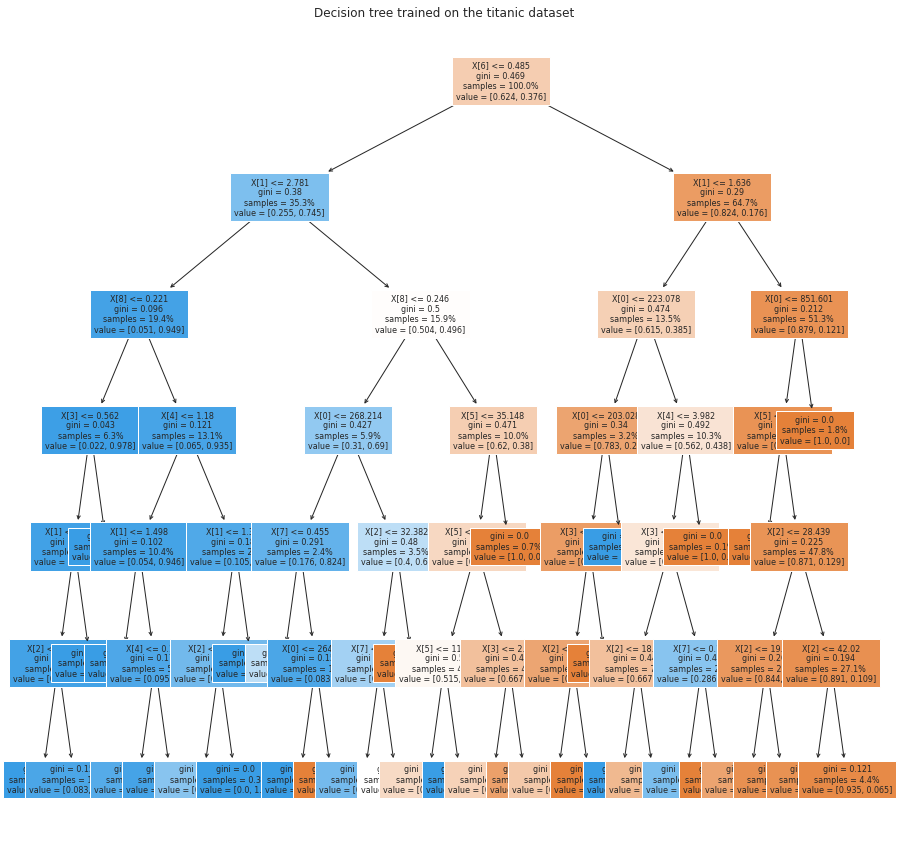

In [69]:
plt.figure(figsize=(15,15))
plot_tree(best_model, filled=True, proportion=True, fontsize=8)
plt.title("Decision tree trained on the titanic dataset")
plt.show()

Is it easy to interpret its results? Are you able to explain to a random person why would they survive / die on the titanic?

*Ok, let's first interpret the root node splitting.*

In [70]:
X = titanic_changed.drop(columns=['Survived'])
y = titanic_changed['Survived']

In [71]:
print(f'Column to divide first is "{X.columns[6]}".')

Column to divide first is "Sex_male".


*So, this is an absolutly understandable result. We've already explained in previous notebooks, why this feature is important for classification.*

In [72]:
print(f'Column to divide men and women on the second level is "{X.columns[1]}".')

Column to divide men and women on the second level is "Pclass".


*Our tree divided women into 1)group from first and second classes and 2)from the third class. Men were divided in other way. The first group was from the first class. And the secont and the third class were in the second group.*

*These splits is also explainable, because passengers with higher class lived higher and had more possibilities to climb on deck and to run to the boats earlier.*

In [73]:
print(f'Next column to split women on the third tree level is "{X.columns[8]}".')

Next column to split women on the third tree level is "Embarked_S".


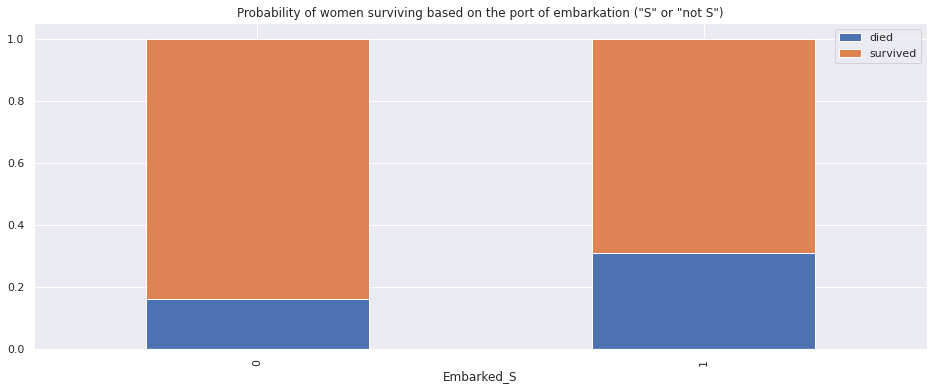

In [74]:
titanic_changed[(titanic_changed.Sex_male==0)].groupby(['Embarked_S', 'Survived']).size().unstack()\
                .apply(lambda x: pd.Series([float(el)/sum(x) for el in x], index=['died', 'survived']), axis=1)\
                .plot(kind='bar', stacked=True, \
                      title='Probability of women surviving based on the port of embarkation ("S" or "not S")');

*As we can observe, women who landed at the Southhampton port, had less chances to survive.*

In [75]:
print(f'Next column to split men on the third tree level is "{X.columns[0]}".')

Next column to split men on the third tree level is "PassengerId".


*That's a really crazy feature to split. I actually don't know, why I didn't drop it. It doesn't make sense, because new passengers can be mixed in different sequence.*

***Conclusion***

*So, after analyzing first three levels we can conclude, that most splitting made by decision tree are expainable. I suppose, it's harder to explain spittings at the last levels, but they still will have some sense.*